# COUNTRY CLUSTERING FOR NGO

In [578]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import IncrementalPCA
from mpl_toolkits.mplot3d import Axes3D



In [488]:
#importing the dataset
country_data=pd.read_csv("Country-data.csv")

In [489]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [490]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


As we see, there are no null values.

In [491]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [492]:
rows_and_cols=country_data.shape

In [493]:
print('There are {} rows and {} columns .\n'.format(rows_and_cols[0],rows_and_cols[1]))

There are 167 rows and 10 columns .



In [494]:
#converting from percentage values to absolute values
country_data['exports']=country_data['exports']*country_data['gdpp']/100
country_data['health']=country_data['health']*country_data['gdpp']/100
country_data['imports']=country_data['imports']*country_data['gdpp']/100

In [495]:
#checking for null values
country_data.apply(lambda x:sum(x.isnull()),axis=0)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Hence, there are no null values

# Univariate analysis

Text(0.5, 0, 'gdpp')

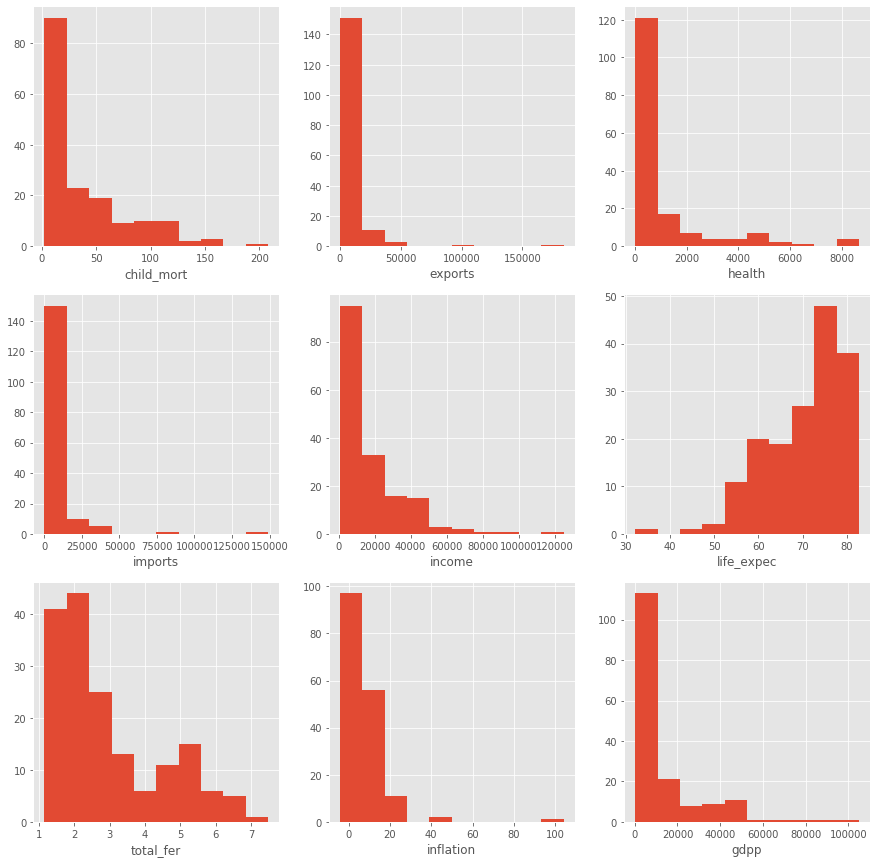

In [496]:
#plotting the histogram
plt.style.use('ggplot')
fig, axs = plt.subplots(3,3,figsize = (15,15))


axs[0,0].hist(country_data['child_mort'],bins=10)
axs[0,0].set_xlabel('child_mort')

axs[0,1].hist(country_data['exports'],bins=10)
axs[0,1].set_xlabel('exports')

axs[0,2].hist(country_data['health'],bins=10)
axs[0,2].set_xlabel('health')

axs[1,0].hist(country_data['imports'],bins=10)
axs[1,0].set_xlabel('imports')

axs[1,1].hist(country_data['income'],bins=10)
axs[1,1].set_xlabel('income')

axs[1,2].hist(country_data['life_expec'],bins=10)
axs[1,2].set_xlabel('life_expec')

axs[2,0].hist(country_data['total_fer'],bins=10)
axs[2,0].set_xlabel('total_fer')

axs[2,1].hist(country_data['inflation'],bins=10)
axs[2,1].set_xlabel('inflation')

axs[2,2].hist(country_data['gdpp'],bins=10)
axs[2,2].set_xlabel('gdpp')


# Bivariate analysis

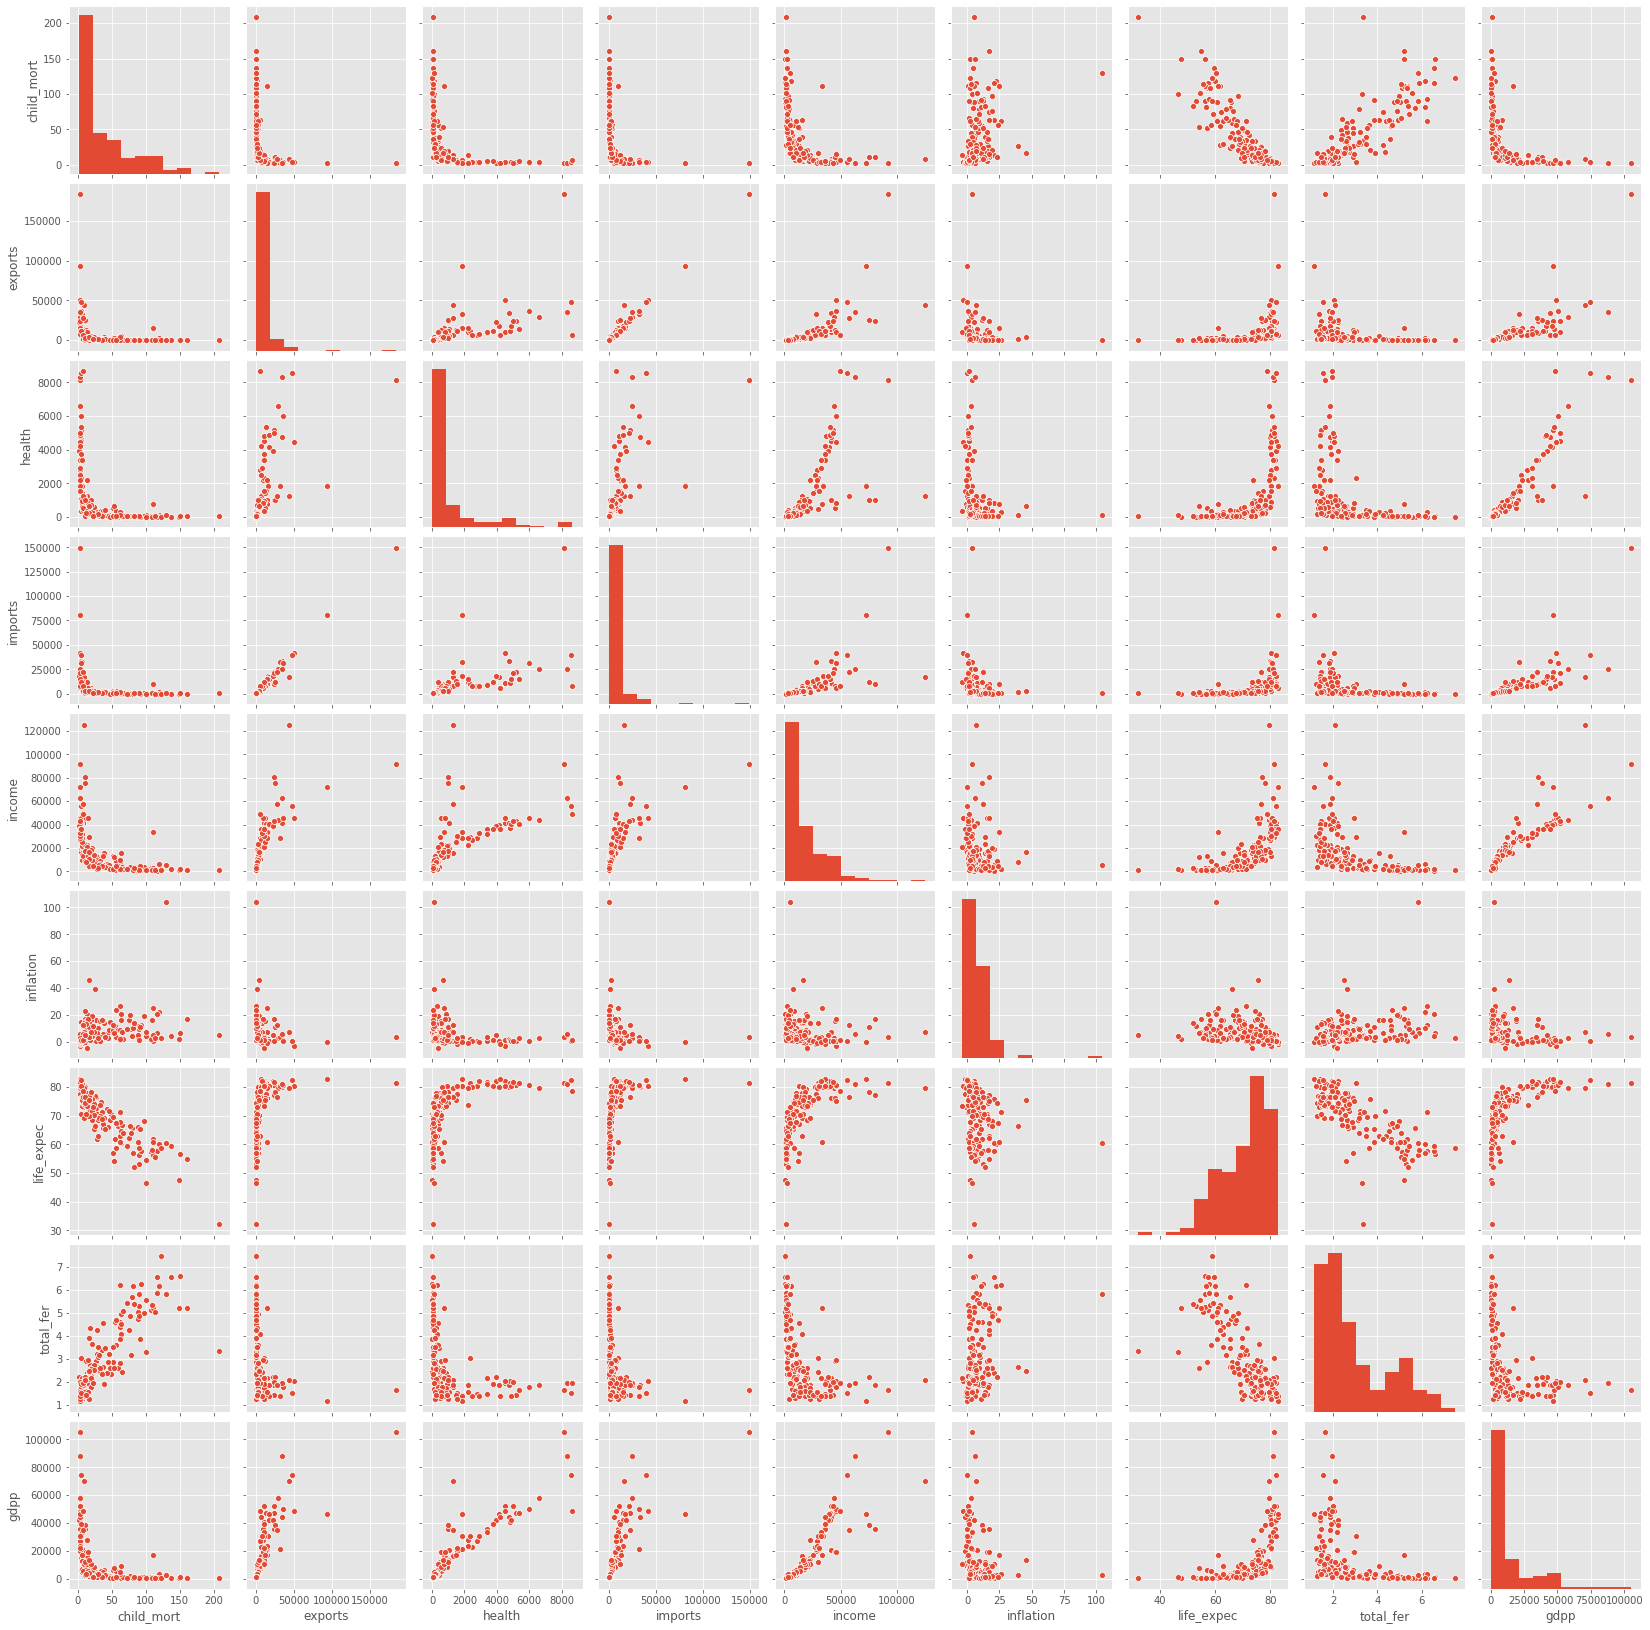

In [497]:
#plotting a pairplot
sns.pairplot(country_data)

# Outlier analysis

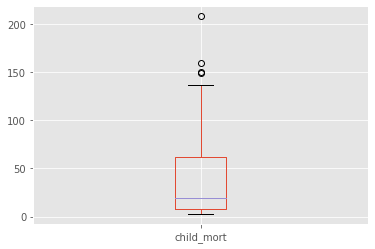

In [498]:
#creating box plots for every column to detect the outliers
country_data.boxplot(column='child_mort')

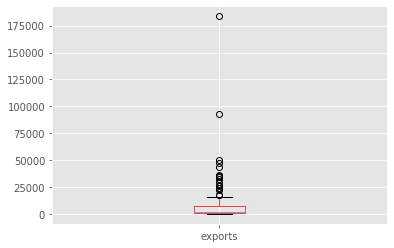

In [499]:
country_data.boxplot(column='exports')

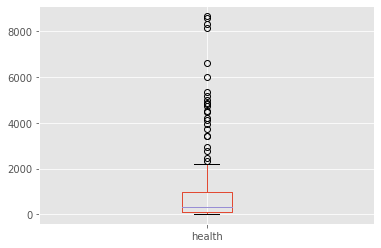

In [500]:
country_data.boxplot(column='health')

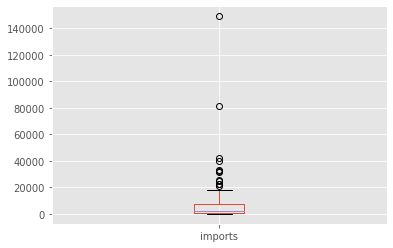

In [501]:
country_data.boxplot(column='imports')

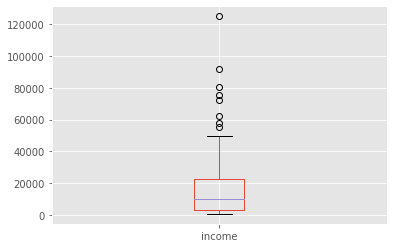

In [502]:
country_data.boxplot(column='income')

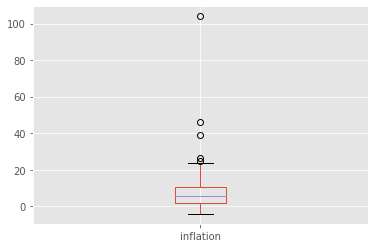

In [503]:
country_data.boxplot(column='inflation')

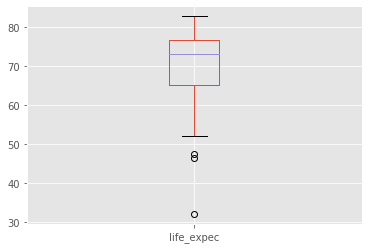

In [504]:
country_data.boxplot(column='life_expec')

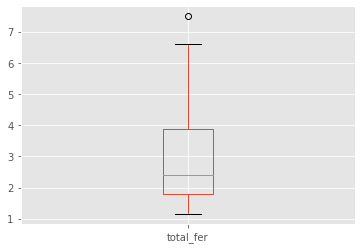

In [505]:
country_data.boxplot(column='total_fer')

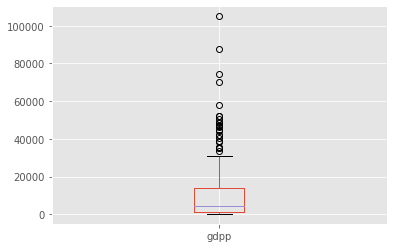

In [506]:
country_data.boxplot(column='gdpp')

In [516]:
#function to exclude the outliers using interquartile range rule
def remove_outlier(df_in, column_name):
    q1 = df_in[column_name].quantile(0.25) #first quartile
    q3 = df_in[column_name].quantile(0.75) #third quartile
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[column_name] > low) & (df_in[column_name] < high)]
    return df_out

In [517]:
features=country_data.drop(['country'],axis=1)
for i in features:
    country_data=remove_outlier(country_data,i)

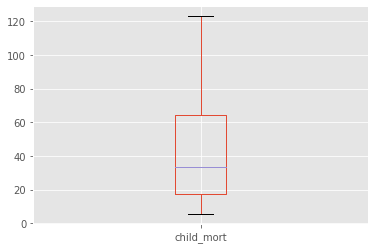

In [518]:
#Checking if the outliers are removed
country_data.boxplot(column='child_mort')

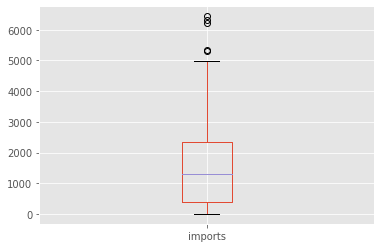

In [519]:
country_data.boxplot(column='imports')

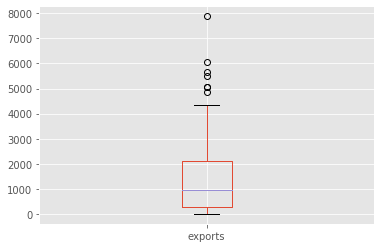

In [520]:
 country_data.boxplot(column='exports')

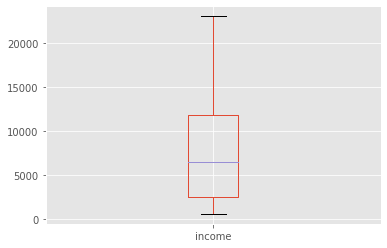

In [521]:
    country_data.boxplot(column='income')


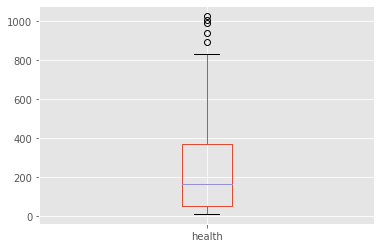

In [522]:
    country_data.boxplot(column='health')

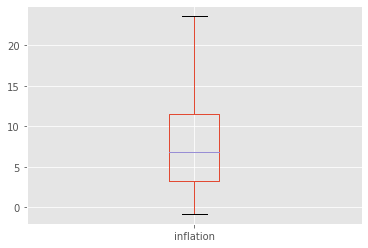

In [523]:
    country_data.boxplot(column='inflation')


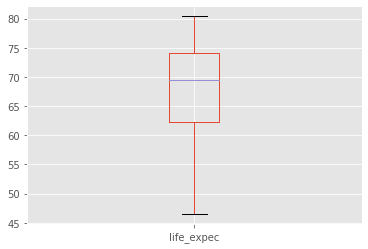

In [524]:
    country_data.boxplot(column='life_expec')


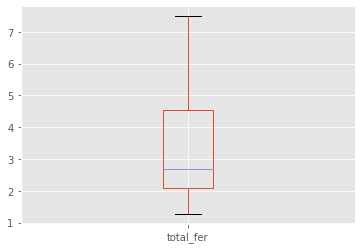

In [525]:
    country_data.boxplot(column='total_fer')


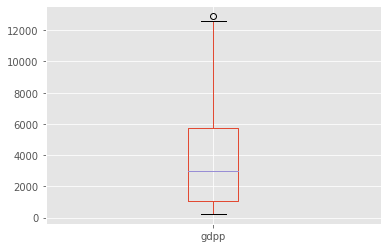

In [526]:
    country_data.boxplot(column='gdpp')


Hence, we see that all the outliers are removed by the interquartile range rule.

# Quantifying the association of features

In [527]:
corr_columns=country_data.corr()
corr_columns

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.530871,-0.614047,-0.642670,-0.698160,0.177184,-0.836172,0.874184,-0.655366
exports,-0.530871,1.000000,0.683512,0.885692,0.827081,-0.122215,0.460838,-0.504795,0.823002
health,-0.614047,0.683512,1.000000,0.729335,0.830216,-0.176915,0.552932,-0.588663,0.928540
imports,-0.642670,0.885692,0.729335,1.000000,0.775628,-0.327765,0.545057,-0.596382,0.798100
income,-0.698160,0.827081,0.830216,0.775628,1.000000,-0.018326,0.637281,-0.692262,0.945204
inflation,0.177184,-0.122215,-0.176915,-0.327765,-0.018326,1.000000,-0.151540,0.202423,-0.112353
life_expec,-0.836172,0.460838,0.552932,0.545057,0.637281,-0.151540,1.000000,-0.763791,0.591173
total_fer,0.874184,-0.504795,-0.588663,-0.596382,-0.692262,0.202423,-0.763791,1.000000,-0.630836
gdpp,-0.655366,0.823002,0.928540,0.798100,0.945204,-0.112353,0.591173,-0.630836,1.000000


This table shows the correlation between the different features of the dataset.

# Standardising the data using StandardScalar

In [528]:
#instantiating the scalar
scaler=StandardScaler()
#listing the features
features=country_data.drop(['country'],axis=1)
#Scaling the features 
features_scaled=scaler.fit_transform(features)

# Using PCA

([<matplotlib.axis.XTick at 0x17be567fc48>,
 <a list of 10 Text xticklabel objects>)

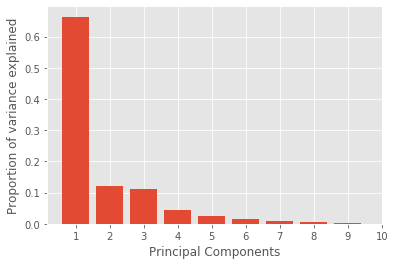

In [529]:
#instantiating the model
pca=PCA()
#fitting the model
pca.fit(features_scaled)
#plotting the pca components according to the variance of each component
plt.bar(range(1,pca.n_components_+1),pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Proportion of variance explained')
plt.xticks([1,2,3,4,5,6,7,8,9,10])

In [532]:
two_first_com_var_exp=pca.explained_variance_ratio_.cumsum()[2]
print("The cumulative variance of the first two principal components is {}".format(round(two_first_com_var_exp,5)))

The cumulative variance of the first two principal components is 0.89457


So we are considering the first three principle components since they explain 90% of the variance.

# Visualizing the first three principal components

In [534]:
pca=PCA(n_components=3)
p_comps=pca.fit_transform(features_scaled)

C:\Users\91952\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


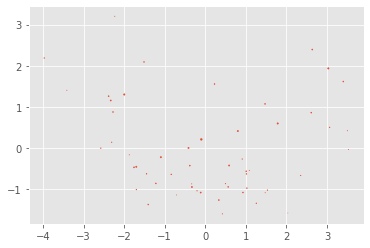

In [585]:
p_comp1=p_comps[:,0]
p_comp2=p_comps[:,1]
p_comp3=p_comps[:,2]
plt.scatter(p_comp1,p_comp2,p_comp3)

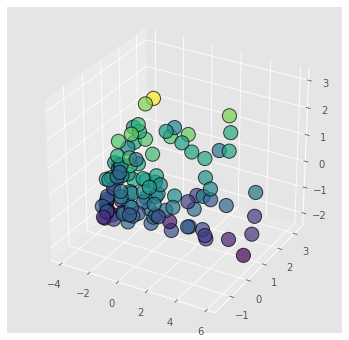

In [584]:
#3D plot of the three principle components
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p_comp1, p_comp2, p_comp3,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200, c=p_comp3)
plt.show()

In [536]:
#using incremental PCA for greater efficiency
pca_final = IncrementalPCA(n_components=3)
df_pca = pca_final.fit_transform(features_scaled)
df_pca.shape
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2
0,-3.312743,0.711918,-0.655641
1,1.258690,-1.331973,0.522649
2,0.802597,0.441808,1.712856
3,-2.232762,3.206173,0.133538
4,3.039420,1.969068,1.934390


# Using kmeans clustering

range(1, 10)
[990.0, 533.5842491129368, 376.83959019835675, 329.4978909163831, 285.3407012870189, 249.52234084051534, 228.4382057760484, 208.84199871170284, 192.97008378734625]


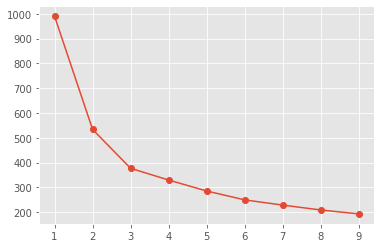

In [537]:
#iterating over 10 different values of k
ks=range(1,10)
inertias=[]
for k in ks:
    km=KMeans(n_clusters=k,random_state=1)
    km.fit(features_scaled)
    inertias.append(km.inertia_)
plt.plot(ks,inertias,marker='o')
print(ks)
print(inertias)

Here, we choose k=3 because the elbow is at 3.

In [538]:
#using kmeans clustering
km=KMeans(n_clusters=3,random_state=1)

In [539]:
km.fit(features_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

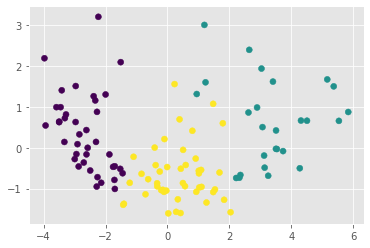

In [540]:
plt.scatter(p_comp1,p_comp2,c=km.labels_)

In [541]:
#adding a column for the kmeans clusters
country_data['Cluster']=km.labels_

In [542]:
country_data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,1
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,2
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.80,69.1,1.92,5840,2
12,Bangladesh,49.4,121.28,26.6816,165.244,2440,7.14,70.4,2.33,758,2
14,Belarus,5.5,3099.42,338.2830,3889.350,16200,15.10,70.4,1.49,6030,1
16,Belize,18.8,2525.88,225.6800,2495.500,7880,1.14,71.4,2.71,4340,2


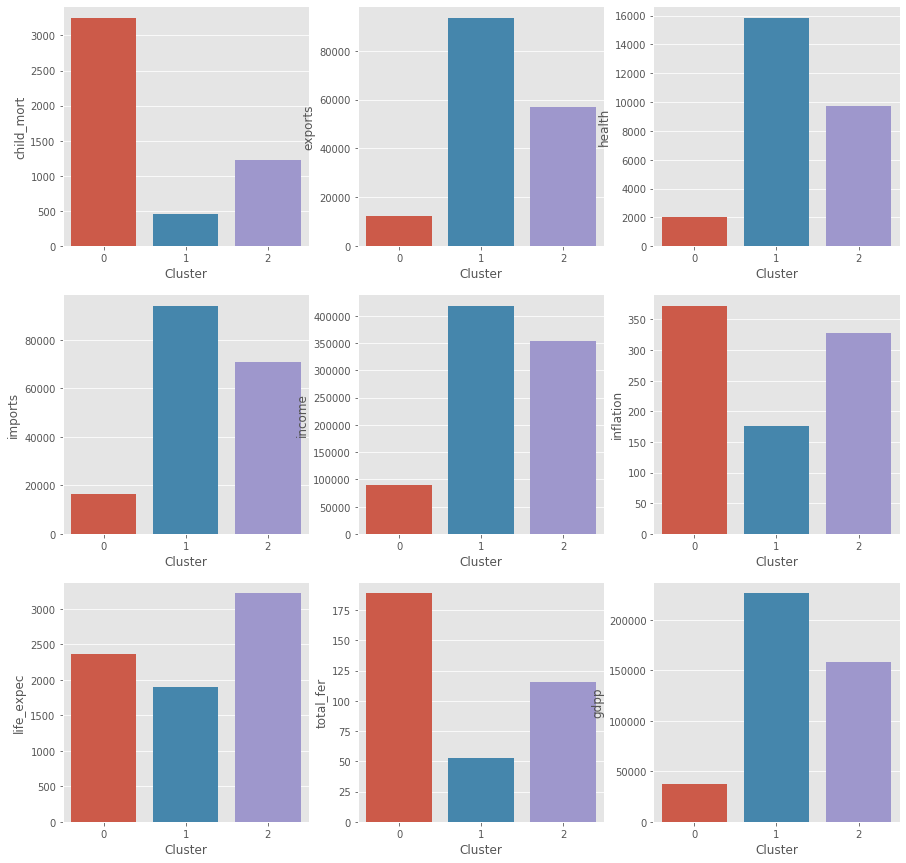

In [543]:
#Visualising the features of the three clusters using bar plot to draw conclusions
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x="Cluster",y="child_mort",data=country_data,estimator=sum,ci=None, ax = axs[0,0])
sns.barplot(x="Cluster",y="exports",data=country_data,estimator=sum,ci=None,ax = axs[0,1])
sns.barplot(x="Cluster",y="health",data=country_data,estimator=sum,ci=None,ax = axs[0,2])
sns.barplot(x="Cluster",y="imports",data=country_data,estimator=sum,ci=None,ax = axs[1,0])
sns.barplot(x="Cluster",y="income",data=country_data,estimator=sum,ci=None,ax = axs[1,1])
sns.barplot(x="Cluster",y="inflation",data=country_data,estimator=sum,ci=None,ax = axs[1,2])
sns.barplot(x="Cluster",y="life_expec",data=country_data,estimator=sum,ci=None,ax = axs[2,0])
sns.barplot(x="Cluster",y="total_fer",data=country_data,estimator=sum,ci=None,ax = axs[2,1])
sns.barplot(x="Cluster",y="gdpp",data=country_data,estimator=sum,ci=None,ax = axs[2,2])

# Count,mean and sum of every cluster 

In [544]:
coun_mean_sum=country_data.groupby('Cluster')['child_mort'].agg(['count','mean','sum'])
print(coun_mean_sum)

         count       mean     sum
Cluster                          
0           39  83.320513  3249.5
1           26  17.692308   460.0
2           45  27.377778  1232.0


In [545]:
coun_mean_sum=country_data.groupby('Cluster')['exports'].agg(['count','mean','sum'])
print(coun_mean_sum)

         count         mean          sum
Cluster                                 
0           39   319.530654  12461.69552
1           26  3594.977308  93469.41000
2           45  1267.843022  57052.93600


In [546]:
coun_mean_sum=country_data.groupby('Cluster')['health'].agg(['count','mean','sum'])
print(coun_mean_sum)

         count        mean         sum
Cluster                               
0           39   52.362672   2042.1442
1           26  609.417500  15844.8550
2           45  215.582853   9701.2284


In [547]:
coun_mean_sum=country_data.groupby('Cluster')['income'].agg(['count','mean','sum'])
print(coun_mean_sum)

         count          mean     sum
Cluster                             
0           39   2290.641026   89335
1           26  16107.692308  418800
2           45   7873.555556  354310


In [548]:
coun_mean_sum=country_data.groupby('Cluster')['imports'].agg(['count','mean','sum'])
print(coun_mean_sum)

         count         mean           sum
Cluster                                  
0           39   418.461695  16320.006092
1           26  3620.605769  94135.750000
2           45  1579.693644  71086.214000


In [549]:
coun_mean_sum=country_data.groupby('Cluster')['inflation'].agg(['count','mean','sum'])
print(coun_mean_sum)

         count      mean      sum
Cluster                          
0           39  9.551410  372.505
1           26  6.779462  176.266
2           45  7.272911  327.281


In [550]:
coun_mean_sum=country_data.groupby('Cluster')['life_expec'].agg(['count','mean','sum'])
print(coun_mean_sum)

         count       mean     sum
Cluster                          
0           39  60.800000  2371.2
1           26  72.926923  1896.1
2           45  71.515556  3218.2


In [551]:
coun_mean_sum=country_data.groupby('Cluster')['total_fer'].agg(['count','mean','sum'])
print(coun_mean_sum)

         count      mean     sum
Cluster                         
0           39  4.843077  188.88
1           26  2.038462   53.00
2           45  2.574000  115.83


In [552]:
coun_mean_sum=country_data.groupby('Cluster')['gdpp'].agg(['count','mean','sum'])
print(coun_mean_sum)

         count         mean     sum
Cluster                            
0           39   951.230769   37098
1           26  8703.846154  226300
2           45  3524.977778  158624


# Results: Cluster 0 - Countries which require aid immedialtely

In [554]:
country_data[country_data.Cluster == 0].country.values


array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Eritrea', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'India', 'Kenya', 'Kiribati', 'Lao', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mauritania', 'Mozambique',
       'Myanmar', 'Nepal', 'Niger', 'Pakistan', 'Rwanda', 'Senegal',
       'Solomon Islands', 'Sudan', 'Tajikistan', 'Tanzania', 'Togo',
       'Uganda', 'Yemen', 'Zambia'], dtype=object)

# Hierarchial clustering

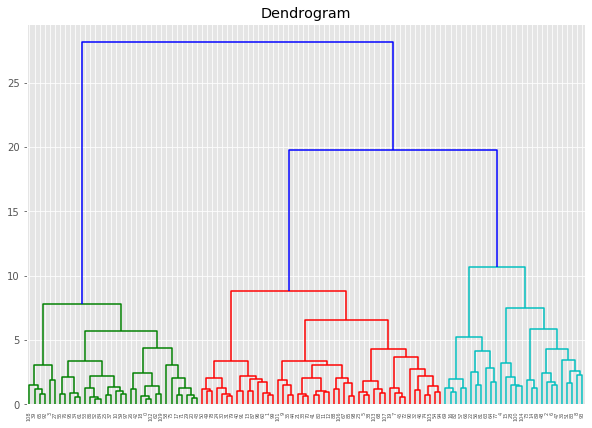

In [555]:
#plotting the dendogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(features_scaled, method='ward'))

Looking at the dendogram, we choose the number of clusters as 4.

In [556]:
#instantiating the hierarchial clustering 
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
#fiting and predicting on the scaled features
cluster.fit_predict(features_scaled)

array([1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 3, 1, 1, 0, 1, 0,
       3, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 3, 3, 1, 1, 0, 1, 1, 3, 3, 1,
       3, 0, 0, 3, 0, 1, 0, 2, 0, 1, 1, 3, 0, 0, 0, 3, 3, 2, 1, 0, 1, 0,
       0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1],
      dtype=int64)

In [557]:
#displaying the cluster labels
print(cluster.labels_)

[1 0 2 1 2 0 2 0 2 0 1 0 0 0 2 2 3 1 1 0 1 0 3 0 0 1 1 1 2 1 0 0 0 0 1 0 2
 1 0 1 0 0 1 1 0 0 0 2 2 0 0 2 1 1 0 1 3 3 1 1 0 1 1 3 3 1 3 0 0 3 0 1 0 2
 0 1 1 3 0 0 0 3 3 2 1 0 1 0 0 2 0 0 1 2 0 1 0 1 0 0 2 0 1 0 2 0 0 0 1 1]


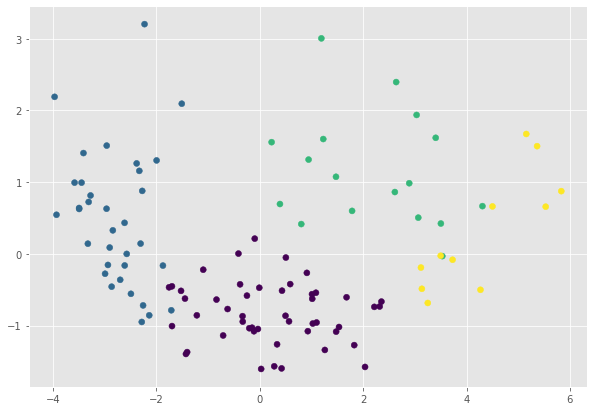

In [558]:
plt.figure(figsize=(10, 7))  
plt.scatter(p_comp1,p_comp2,c=cluster.labels_)

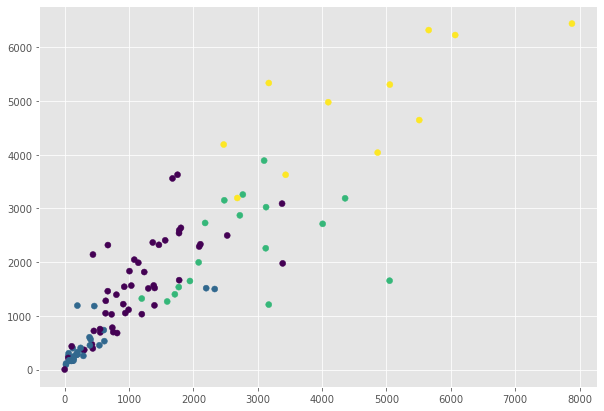

In [559]:
plt.figure(figsize=(10, 7))  
plt.scatter(country_data['exports'],country_data['imports'], c=cluster.labels_) 

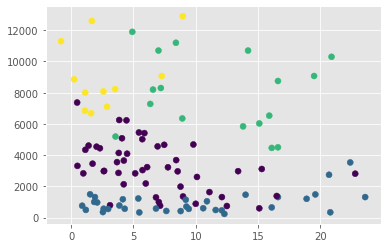

In [560]:
plt.scatter(country_data['inflation'],country_data['gdpp'], c=cluster.labels_) 

In [574]:
#Adding a column for the clusters using hierarchical clustering
country_data['Cluster2']=cluster.labels_
country_data.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,Cluster2
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,0,1
1,Albania,16.6,1145.200,267.8950,1987.740,9930,4.490,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.640,185.9820,1400.440,12900,16.100,76.5,2.89,4460,2,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0,1
5,Argentina,14.5,1946.700,834.3000,1648.000,18700,20.900,75.8,2.37,10300,1,2
6,Armenia,18.1,669.760,141.6800,1458.660,6700,7.770,73.3,1.69,3220,2,0
9,Azerbaijan,39.2,3171.120,343.3920,1208.880,16000,13.800,69.1,1.92,5840,2,2
12,Bangladesh,49.4,121.280,26.6816,165.244,2440,7.140,70.4,2.33,758,2,0
14,Belarus,5.5,3099.420,338.2830,3889.350,16200,15.100,70.4,1.49,6030,1,2
16,Belize,18.8,2525.880,225.6800,2495.500,7880,1.140,71.4,2.71,4340,2,0


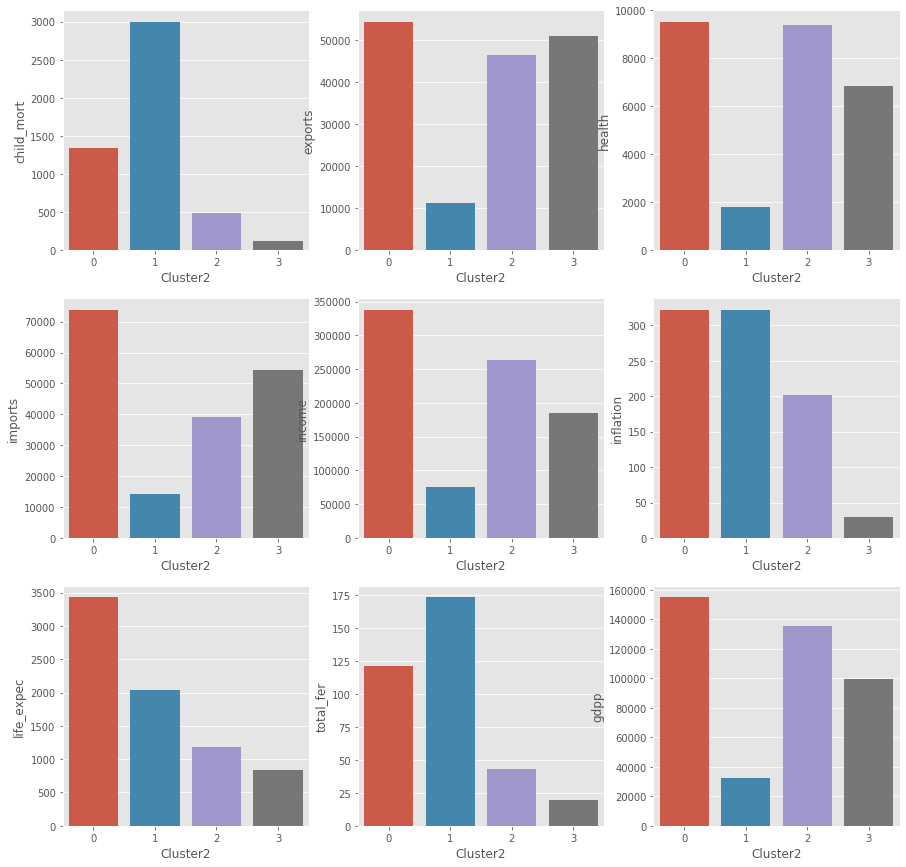

In [562]:
#visualising the different features of the clusters using bar plots
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x="Cluster2",y="child_mort",data=country_data,estimator=sum,ci=None, ax = axs[0,0])
sns.barplot(x="Cluster2",y="exports",data=country_data,estimator=sum,ci=None,ax = axs[0,1])
sns.barplot(x="Cluster2",y="health",data=country_data,estimator=sum,ci=None,ax = axs[0,2])
sns.barplot(x="Cluster2",y="imports",data=country_data,estimator=sum,ci=None,ax = axs[1,0])
sns.barplot(x="Cluster2",y="income",data=country_data,estimator=sum,ci=None,ax = axs[1,1])
sns.barplot(x="Cluster2",y="inflation",data=country_data,estimator=sum,ci=None,ax = axs[1,2])
sns.barplot(x="Cluster2",y="life_expec",data=country_data,estimator=sum,ci=None,ax = axs[2,0])
sns.barplot(x="Cluster2",y="total_fer",data=country_data,estimator=sum,ci=None,ax = axs[2,1])
sns.barplot(x="Cluster2",y="gdpp",data=country_data,estimator=sum,ci=None,ax = axs[2,2])

# Count,mean and sum of every cluster

In [563]:
coun_mean_sum=country_data.groupby('Cluster2')['child_mort'].agg(['count','mean','sum'])
print(coun_mean_sum)

          count       mean     sum
Cluster2                          
0            48  27.939583  1341.1
1            34  88.200000  2998.8
2            17  28.464706   483.9
3            11  10.700000   117.7


In [564]:
coun_mean_sum=country_data.groupby('Cluster2')['exports'].agg(['count','mean','sum'])
print(coun_mean_sum)

          count         mean          sum
Cluster2                                 
0            48  1132.146011  54343.00852
1            34   333.908029  11352.87300
2            17  2729.446471  46400.59000
3            11  4626.142727  50887.57000


In [565]:
coun_mean_sum=country_data.groupby('Cluster2')['health'].agg(['count','mean','sum'])
print(coun_mean_sum)

          count        mean        sum
Cluster2                              
0            48  198.481550  9527.1144
1            34   52.426418  1782.4982
2            17  553.784941  9414.3440
3            11  624.024636  6864.2710


In [566]:
coun_mean_sum=country_data.groupby('Cluster2')['imports'].agg(['count','mean','sum'])
print(coun_mean_sum)

          count         mean           sum
Cluster2                                  
0            48  1539.442731  73893.251092
1            34   419.354971  14258.069000
2            17  2300.227647  39103.870000
3            11  4935.161818  54286.780000


In [567]:
coun_mean_sum=country_data.groupby('Cluster2')['income'].agg(['count','mean','sum'])
print(coun_mean_sum)

          count          mean     sum
Cluster2                             
0            48   7047.083333  338260
1            34   2215.441176   75325
2            17  15474.117647  263060
3            11  16890.909091  185800


In [568]:
coun_mean_sum=country_data.groupby('Cluster2')['inflation'].agg(['count','mean','sum'])
print(coun_mean_sum)

          count       mean      sum
Cluster2                           
0            48   6.712313  322.191
1            34   9.472794  322.075
2            17  11.860588  201.630
3            11   2.741455   30.156


In [569]:
coun_mean_sum=country_data.groupby('Cluster2')['life_expec'].agg(['count','mean','sum'])
print(coun_mean_sum)

          count       mean     sum
Cluster2                          
0            48  71.406250  3427.5
1            34  59.958824  2038.6
2            17  69.617647  1183.5
3            11  75.990909   835.9


In [570]:
coun_mean_sum=country_data.groupby('Cluster2')['total_fer'].agg(['count','mean','sum'])
print(coun_mean_sum)

          count      mean     sum
Cluster2                         
0            48  2.534583  121.66
1            34  5.103235  173.51
2            17  2.516471   42.78
3            11  1.796364   19.76


In [571]:
coun_mean_sum=country_data.groupby('Cluster2')['gdpp'].agg(['count','mean','sum'])
print(coun_mean_sum)

          count         mean     sum
Cluster2                            
0            48  3227.541667  154922
1            34   945.294118   32140
2            17  7958.823529  135300
3            11  9060.000000   99660


# Results: Cluster 1 - countries that require aid immediately

In [573]:
country_data[country_data.Cluster2 == 1].country.values

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Eritrea', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mauritania', 'Mozambique', 'Niger',
       'Pakistan', 'Rwanda', 'Senegal', 'Sudan', 'Tanzania', 'Togo',
       'Uganda', 'Yemen', 'Zambia'], dtype=object)